# Hello readers Muid here 

# Here we are going to make a model to predict the monetary value of a house located at the Boston area

**To Remove Warning**

In [171]:
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

## **Importing Libraries**

In [172]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import math

## **Loading The dataset**

In [173]:

boston_dataset = pd.read_csv("C:\\Users\\muidc\\Downloads\\boston_house_prices.csv")

In [174]:
boston_dataset.head(4)

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


Here we can see there are unnamed columns name in the data we have reset the index

In [175]:
boston_dataset.columns = boston_dataset.iloc[0]
boston_dataset = boston_dataset[1:]

In [176]:
boston_dataset = boston_dataset.reset_index(drop=True) 

In [177]:
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
502,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
503,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
504,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


In [178]:
df = boston_dataset

## **Checking Null Value**

In [179]:
df.isnull().sum()

0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## **plotting numerical columns**

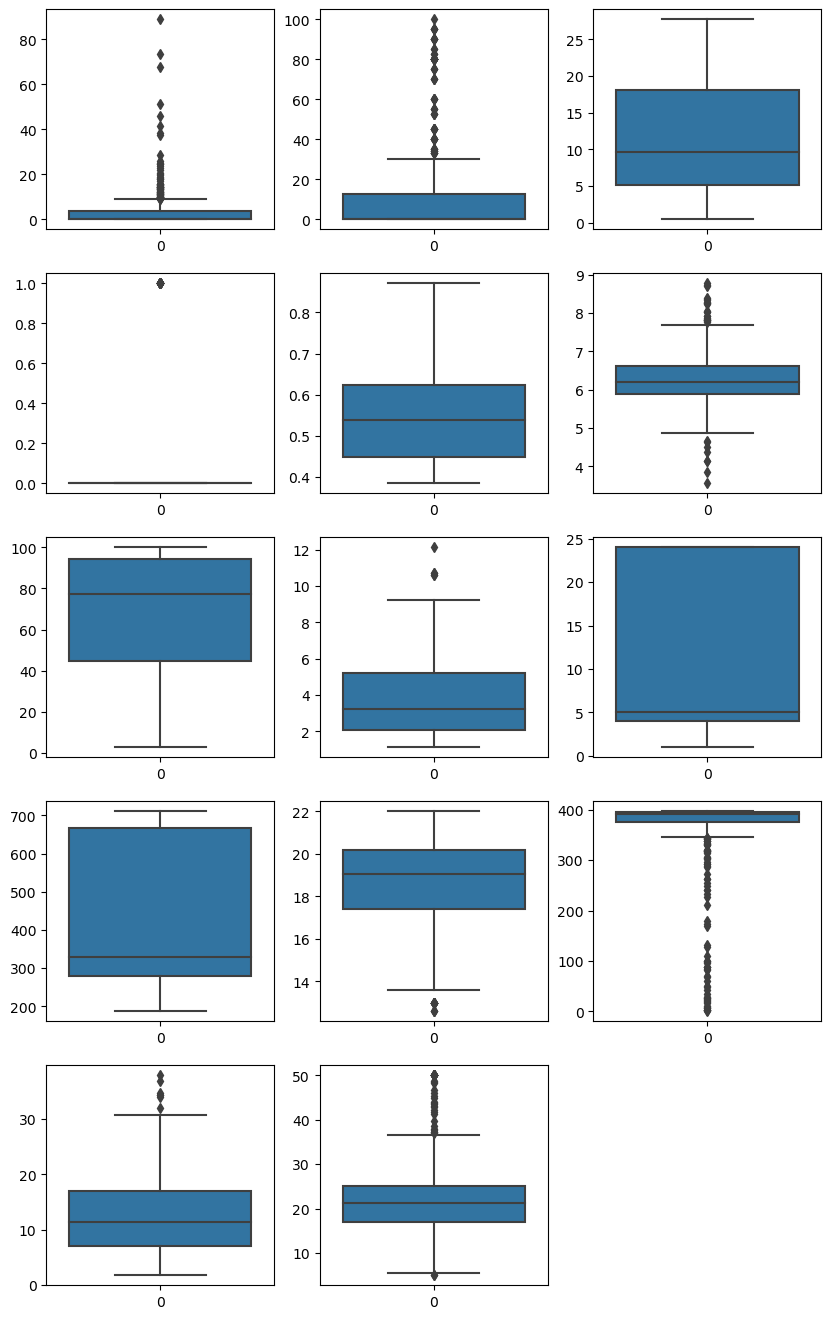

In [180]:
counter = 1
plt.figure(figsize=(10,20))
for i in df:
    plt.subplot(6,3,counter)
    sns.boxplot(df[i])
    counter = counter+1
plt.show()

## **Removing Outliers from this dataset**

In [181]:
def remove_outlier(df):
    col_vals = df.columns
    df1 = df.copy()
    for col in col_vals:
        if df[col].dtype != 'object':  # Check if column is numeric
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)

            iqr = q3 - q1

            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)

            df1[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df1


## **Applying method of outlier**

In [182]:
remove_outlier(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
502,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
503,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
504,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


## **Spliting the Dataset into X and Y**

In [183]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [184]:
x.shape

(506, 13)

In [185]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object', name=0)

In [186]:
y.shape

(506,)

In [187]:
y.ndim

1

## **Linear Regression**

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
model = LinearRegression()

In [190]:
from sklearn.model_selection import  train_test_split

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [192]:
model.fit(x_train, y_train)

LinearRegression()

In [193]:
y_pred = model.predict(x_test)

In [194]:
y_pred.shape

(152,)

In [195]:
train_score = model.score(x_train, y_train)
print("Training score is", (train_score)*100)

Training score is 74.34997532004697


In [196]:
test_score = model.score(x_test, y_test)
print("Test Score is", (test_score)*100)

Test Score is 71.12260057484893


# Evaluating model

Calculating MAE, MSE, RMSE and Accuracy

In [197]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [198]:
print('Mean absolute error is:', mean_absolute_error(y_test, y_pred))

Mean absolute error is: 3.1627098714574355


In [199]:
print('Mean squared error is:', mean_squared_error(y_test, y_pred))

Mean squared error is: 21.5174442311775


In [200]:
print('Root Mean squared error is:', math.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error is: 4.6386899261728525


In [201]:
print('R2 score of linear Regression is:',(r2_score(y_test, y_pred))*100)

R2 score of linear Regression is: 71.12260057484893


---

## **Decision Tree**

In [202]:
from sklearn.tree import DecisionTreeRegressor

In [203]:
dt = DecisionTreeRegressor()

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [205]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [206]:
dt_pred = dt.predict(x_test)

In [207]:
dt_pred

array([28.1, 33.1, 15.2, 21.7, 23.2, 18.5, 16.6, 16.7, 22.7, 22. , 27.1,
       27.1,  7.2, 20.5, 18.7, 23.9, 19.5, 10.5, 44. , 16.7, 22.6, 23.7,
       13.6, 22. , 13.8, 11.7, 21. , 13.5, 19.4, 20.7, 19.5, 23.1, 50. ,
       15. , 13.3, 15.6, 33.4, 19. , 21.7, 24.7, 19.8, 28.4, 44. , 18.2,
       21.6, 16.7, 14.9, 23.7, 17.5, 32.5, 21.7, 34.9, 16.6, 32. , 43.1,
       19.9, 15.2, 27.9, 21.6, 22.4, 24.8, 33. , 29.4, 18.2, 26.6, 14.4,
       15.4, 23.2, 27.9, 14.1, 21.8, 28.7,  8.8, 18.6, 21.4, 10.5, 19.3,
       50. , 13.3,  8.1, 21.2, 16.3, 19.4, 10.5, 14.5, 30.1, 14.8, 23. ,
       23.2, 18. , 23.3,  8.8, 18.4, 17.5, 16.2, 18.4, 50. , 16.3, 11.7,
       16.3, 18.5, 28.1])

In [208]:
print('Training score is:', dt.score(x_train, y_train))
print('Test score is:', (dt.score(x_test, y_test))*100)



Training score is: 1.0
Test score is: 69.39978663232485


# Evaluating model

Calculating MAE, MSE, RMSE

In [209]:

print('Mean absolute error is:', mean_absolute_error(y_test, dt_pred))

print('Mean squared error is:', mean_squared_error(y_test, dt_pred))

print('Root Mean squared error is:', math.sqrt(mean_squared_error(y_test, dt_pred)))


Mean absolute error is: 2.7343137254901957
Mean squared error is: 22.440294117647056
Root Mean squared error is: 4.7371187569710616


In [210]:
print('R2 score of DecisionTree is:', (r2_score(y_test, dt_pred))*100)

R2 score of DecisionTree is: 69.39978663232485


---

# Thanks For Reading !